In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Making Sense of the Data
To make the data clear, I checked where the data was gathered. It was compiled for a [FiveThirtyEight article](https://fivethirtyeight.com/features/which-state-has-the-worst-drivers/) that asks which state has the worst drivers. **As such, to be clear, once we start counting the frequencies, we are referring to U.S. states, NOT to individual drivers.** The author gave what the columns meant. Thus, I created a schema for easy reference to understand what the columns refer to and what are the units being used in the data. 

In [84]:
schema = {'total': 'Total Collisions per Billion Miles',
 'speeding': 'Speeding Collisions per Billion Miles',
 'alcohol': 'Alcohol-Related Collisions per Billion Miles',
 'not_distracted' : 'Non-Distracted Collisions per Billion Miles',
 'no_previous': 'Collisions per Billion Miles of Drivers without Previous Accidents',
 'ins_premium': 'Average Combined Insurance Premium in Dollars',
 'ins_losses': 'Losess Incurred per Insured Driver',
 'abbrev': 'Abbreviation of State Name'
}

schema_df = pd.Series(schema)
schema_df

total                            Total Collisions per Billion Miles
speeding                      Speeding Collisions per Billion Miles
alcohol                Alcohol-Related Collisions per Billion Miles
not_distracted          Non-Distracted Collisions per Billion Miles
no_previous       Collisions per Billion Miles of Drivers withou...
ins_premium           Average Combined Insurance Premium in Dollars
ins_losses                       Losess Incurred per Insured Driver
abbrev                                   Abbreviation of State Name
dtype: object

# Univariate Analysis

## Choosing which measure of central tendency
To determine which measure of central tendency was best, I checked the mean $\mu$, median $M_d$, and standard deviation $\sigma$ for each data set. Afterwards, I checked how far away the median is from the mean and then divided that out by the standard deviation. Thus, the formula for the mean-median difference per standard deviation is $\frac{|\mu - M_d|}{\sigma}$. Basically, if this value is small, then the median is relatively not that far from the mean. Looking at the horizontal bar chart below, **I will be using the mean for ```total```, ```not_distracted```, ```no_previous```, and ```ins_losses```. I will be using the median for ```ins_premium```, ```speeding```, and ```alcohol```.** This is based on if the data is below or above the average mean-median difference per standard deviation.


For easy reference, I have added the pandas DataFrame and also table to show how to calculate for the mean-median difference per standard deviation.

In [85]:
df = sns.load_dataset('car_crashes')

mean_val, median_val, std_val, dist_normalized = [], [], [], []
num_columns = df.drop(columns = ['abbrev']).columns.tolist()

for num_column in num_columns:
    mean_val.append(round(df[num_column].mean(), 2))
    median_val.append(round(df[num_column].median(), 2))
    std_val.append(round(df[num_column].std(), 2))
    dist_normed = abs(df[num_column].mean() - df[num_column].median()) / df[num_column].std()
    dist_normalized.append(round(dist_normed, 2))


summary_df = pd.DataFrame({
    'Data': num_columns,
    'Mean': mean_val,
    'Median':median_val,
    'Standard Deviation' : std_val,
    'Mean-Median Difference per Standard Deviation': dist_normalized})

summary_df.sort_values(by = 'Mean-Median Difference per Standard Deviation', inplace = True)
summary_df
#summary_df.set_index('Data', inplace = True)

,Data,Mean,Median,Standard Deviation,Mean-Median Difference per Standard Deviation
0,total,15.79,15.60,4.12,0.05
3,not_distracted,13.57,13.86,4.51,0.06
4,no_previous,14.00,13.78,3.76,0.06
6,ins_losses,134.49,136.05,24.84,0.06
5,ins_premium,886.96,858.97,178.30,0.16
1,speeding,5.00,4.61,2.02,0.19
2,alcohol,4.89,4.55,1.73,0.19


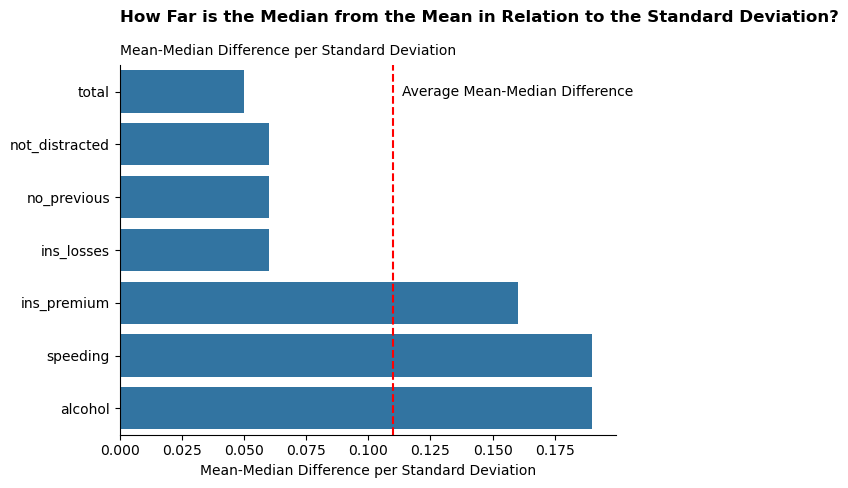

In [86]:
chart = sns.barplot(x='Mean-Median Difference per Standard Deviation', y='Data', data = summary_df, width = 0.8)

plt.title(f'How Far is the Median from the Mean in Relation to the Standard Deviation?\n\n', loc='left', fontweight = 'bold')

# For the red line
plt.axvline(x=0.11, color='red', linestyle='--', label='Reference Line (x=0.11)')
plt.text(0.16, 0, 'Average Mean-Median Difference', ha='center', va='center', rotation='horizontal', fontsize=10) 

# For the axis titles
plt.ylabel('Mean-Median Difference per Standard Deviation', rotation = 0, ha = 'left')
chart.yaxis.set_label_coords(0, 1.02)

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


## Data Story for Total Collisions per Billion Miles
From the histogram below, you can expect that for every 1 billion miles driven in a U.S. state, the expected number of car crash collisions is around 15.79. Most states have similar collision rates without extreme outliers in either direction; this indicates that the distribution of collisions per billion miles is relatively balanced, meaning no significant skew toward unusually high or low values.



In [87]:
def graph(column):
    chart = sns.histplot(data=df, x=column, kde=True)
    
    # Left-align Y-axis label
    plt.ylabel('Frequency', rotation=0, labelpad=30, ha='left')  # Aligns left
    chart.yaxis.set_label_coords(0, 1.02)  # Adjusts position

    # Left-align Title
    plt.title(f'Histogram of {schema_df[column]}\n\n', loc='left', fontweight = 'bold')

    # Left-align X-axis label
    plt.xlabel(schema_df[column])

    # Remove right and top spines
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

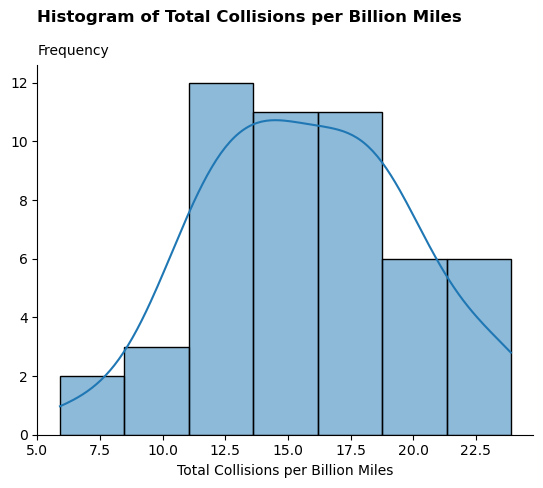

In [88]:
graph('total')

## Data Story for Speeding Collisions per Billion Miles
From the histogram below, approximately half of U.S. states experience a speeding collision rate of 4.61 or higher per billion miles, while the other half fall below this threshold. There is a slight skew to the right, and as such while most states have similar collision rates, there are a few states with notably higher speeding collision rates.





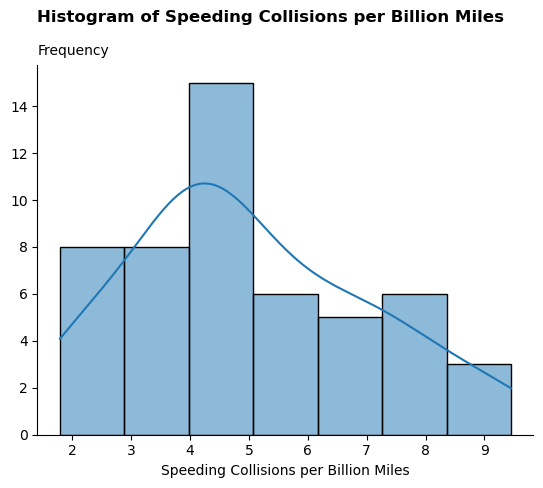

In [89]:
graph('speeding')

## Data Story for Alcohol-Related Collisions per Billion Miles
From the histogram below, approximately half of U.S. states experience an alcohol-related collision rate of 4.55 or higher per billion miles, while the other half fall below this threshold. There is a slight skew to the right, and as such while most states have similar collision rates, there are a few states with notably higher alcohol-related collision rates.

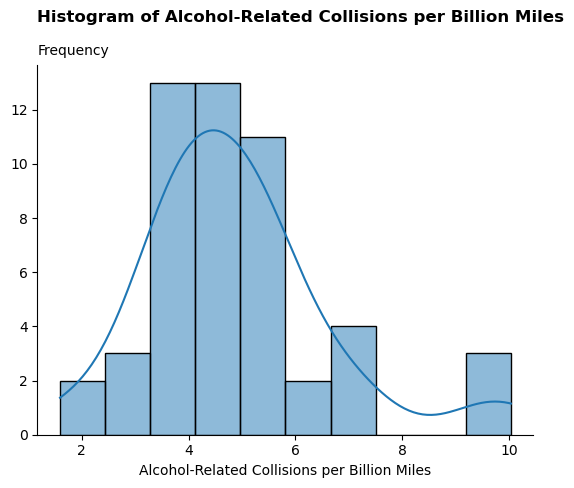

In [90]:
graph('alcohol')

## Data Story for Non-Distracted Collisions per Billion Miles
From the histogram below, you can expect that for every 1 billion miles driven in a U.S. state, the expected numer of car crash collisions is around 13.57. Moreover, most states have similar collision rates without extreme outliers in either direction because of the roughly symmetric shape of the histogram; this indicates that the distribution of collisions per billion miles is relatively balanced, meaning no significant skew toward unusually high or low values.

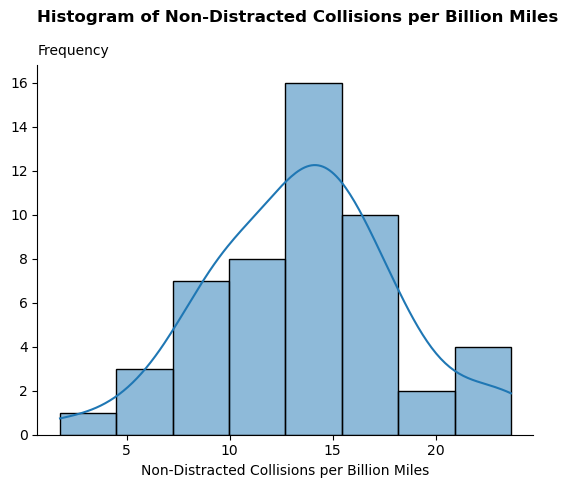

In [91]:
graph('not_distracted')

## Data Story for Collisions per Billion Miles of Drivers without Previous Accidents
From the histogram below, you can expect that for every 1 billion miles driven in a U.S. state, the expected numer of car crash collisions of drivers without previous accidents is around 14. Moreover, most states have similar collision rates without extreme outliers in either direction because of the roughly symmetric shape of the histogram; this indicates that the distribution of collisions per billion miles is relatively balanced, meaning no significant skew toward unusually high or low values.

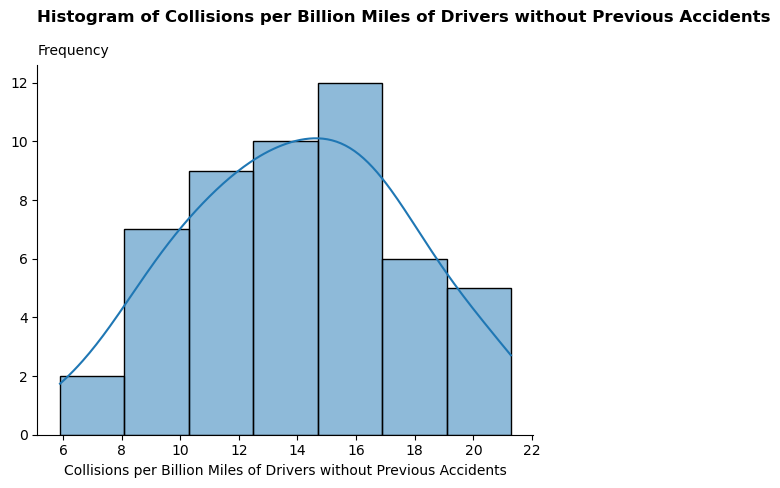

In [92]:
graph('no_previous')

## Data Story for Average Combined Insurance Premium in Dollars
From the histogram below, approximately half of U.S. states have an average combined insurance premium of $858.97, while the other half fall below this threshold. There is a slight skew to the right, and as such while most states pay similar insurance premiums, there are a few states with notably higher insurance premiums.

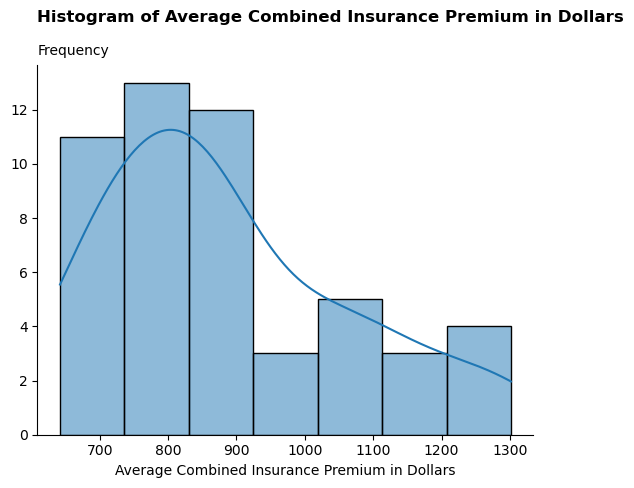

In [93]:
graph('ins_premium')

## Data Story for Losess Incurred per Insured Driver
From the histogram below, you can expect that for any U.S. state, the expected losses incurred per insured driver is $886.96. Moreover, most states have similar lossess incurred without extreme outliers in either direction because of the roughly symmetric shape of the histogram; this indicates that the distribution of lossess incurred is relatively balanced, meaning no significant skew toward unusually high or low values.

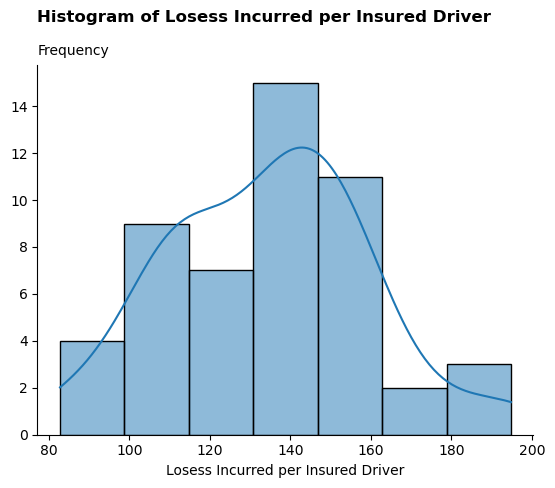

In [94]:
graph('ins_losses')

# Bivariate analysis

## Relationship between the Total Collisions per Billion Miles and the Losses Incurred per Insured Driver
From the scatter plot and the overlaid line plot, there is NO strong evidence for a linear relationship between the total collisions per billion miles and the losses inccured per insured driver because the overlaid line plot does not fit the scatter plot well.

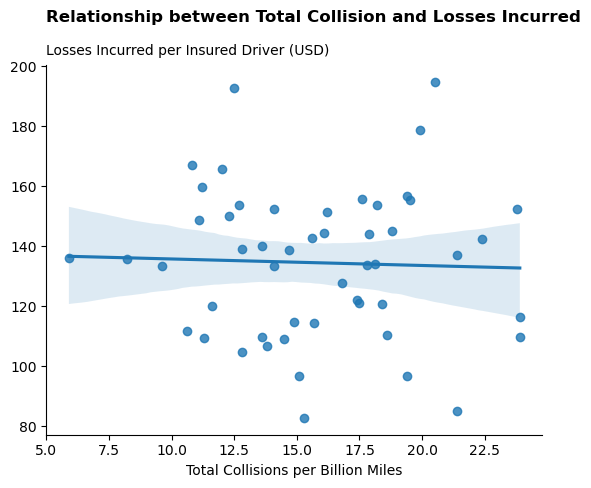

In [95]:
chart = sns.regplot(data = df, x = df['total'], y = df['ins_losses'])

# Left-align Y-axis label
plt.ylabel('Losses Incurred per Insured Driver (USD)', rotation=0, labelpad=30, ha='left')  
plt.xlabel('Total Collisions per Billion Miles')
chart.yaxis.set_label_coords(0, 1.02)  # Adjusts position

# Left-align Title
plt.title(f'Relationship between Total Collision and Losses Incurred\n\n', loc='left', fontweight = 'bold')

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

## Relationship between the Average Combined Insurance Premium and the Losses Incurred per Insured Driver
From the scatter plot and the overlaid line plot, there is moderate evidence for a linear relationship between the average combined insurance premium and the losses inccured per insured driver because the overlaid line plot sort of fits the scatter plot well.

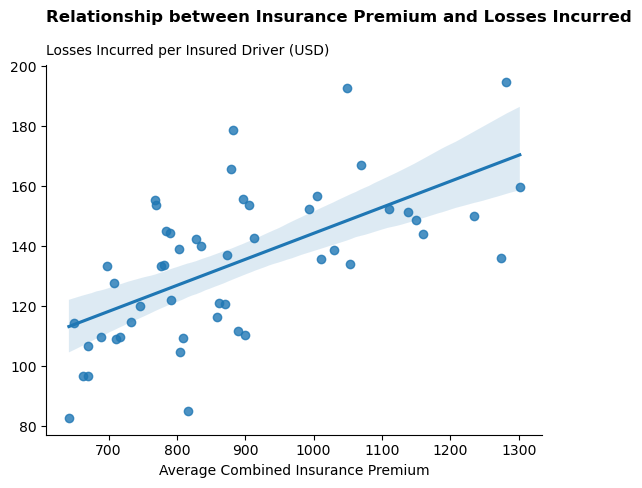

In [96]:
# Relationship between the Average Combined Insurance Premium and the Losses Incurred
chart = sns.regplot(data = df, x = df['ins_premium'], y = df['ins_losses'])
# Left-align Y-axis label
plt.ylabel('Losses Incurred per Insured Driver (USD)', rotation=0, labelpad=30, ha='left')  
plt.xlabel('Average Combined Insurance Premium')
chart.yaxis.set_label_coords(0, 1.02)  # Adjusts position

# Left-align Title
plt.title(f'Relationship between Insurance Premium and Losses Incurred\n\n', loc='left', fontweight = 'bold')

# Remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)